<a href="https://colab.research.google.com/github/JalpaK88/Projects_DeepLearning/blob/main/DDD_inception_v3_3_5_70_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
PATH_OF_DATA= '/content/gdrive/"My Drive"/train_60_20'
!ls {PATH_OF_DATA}

Closed_Eyes  Open_Eyes


In [ ]:
batchsize=8

In [ ]:
train_data_dir = '/content/gdrive/My Drive/train_70/'
validation_data_dir = '/content/gdrive/My Drive/val_20/'

train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2)

train_data= train_datagen.flow_from_directory(train_data_dir,
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

val_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2)

validation_data= val_datagen.flow_from_directory(validation_data_dir,
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 2800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
test_data_dir = '/content/gdrive/My Drive/test_10/'
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(test_data_dir,
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 400 images belonging to 2 classes.


In [ ]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 80, 80, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 39, 39, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 39, 39, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 39, 39, 32)           0         ['batch_normalization[0][0

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [ ]:
model_path = '/content/gdrive/My Drive/Model/Model_3_5/InceptionV3_70_20_10.h5'

checkpoint = ModelCheckpoint(model_path,
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=5)

<ipython-input-14-fc97a5cf3cc7>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,


Epoch 1/5
350/350 [==============================] - ETA: 0s - loss: 0.0878 - accuracy: 0.9668
Epoch 1: val_loss improved from inf to 0.04277, saving model to /content/gdrive/My Drive/Model/Model_3_5/InceptionV3_70_20_10.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


350/350 [==============================] - 710s 2s/step - loss: 0.0878 - accuracy: 0.9668 - val_loss: 0.0428 - val_accuracy: 0.9850 - lr: 0.0010
Epoch 2/5
350/350 [==============================] - ETA: 0s - loss: 0.0523 - accuracy: 0.9843
Epoch 2: val_loss improved from 0.04277 to 0.03885, saving model to /content/gdrive/My Drive/Model/Model_3_5/InceptionV3_70_20_10.h5
350/350 [==============================] - 76s 218ms/step - loss: 0.0523 - accuracy: 0.9843 - val_loss: 0.0388 - val_accuracy: 0.9862 - lr: 0.0010
Epoch 3/5
350/350 [==============================] - ETA: 0s - loss: 0.0372 - accuracy: 0.9886
Epoch 3: val_loss improved from 0.03885 to 0.02178, saving model to /content/gdrive/My Drive/Model/Model_3_5/InceptionV3_70_20_10.h5
350/350 [==============================] - 68s 192ms/step - loss: 0.0372 - accuracy: 0.9886 - val_loss: 0.0218 - val_accuracy: 0.9925 - lr: 0.0010
Epoch 4/5
350/350 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9929
Epoch 4: v

In [ ]:
loss_tr, acc_tr = model.evaluate_generator(train_data)

print(loss_tr)
print(acc_tr)

<ipython-input-15-c527480a9875>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss_tr, acc_tr = model.evaluate_generator(train_data)


0.017159031704068184
0.9932143092155457


In [ ]:
loss_vr, acc_vr = model.evaluate_generator(validation_data)

print(loss_vr)
print(acc_vr)

<ipython-input-16-cc7cefa02e4d>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss_vr, acc_vr = model.evaluate_generator(validation_data)


0.03361440449953079
0.9900000095367432


In [ ]:
loss_test, acc_test = model.evaluate_generator(test_data)
print(loss_test)
print(acc_test)

<ipython-input-17-3f370467cf05>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss_test, acc_test = model.evaluate_generator(test_data)


1.675070780038368e-05
1.0


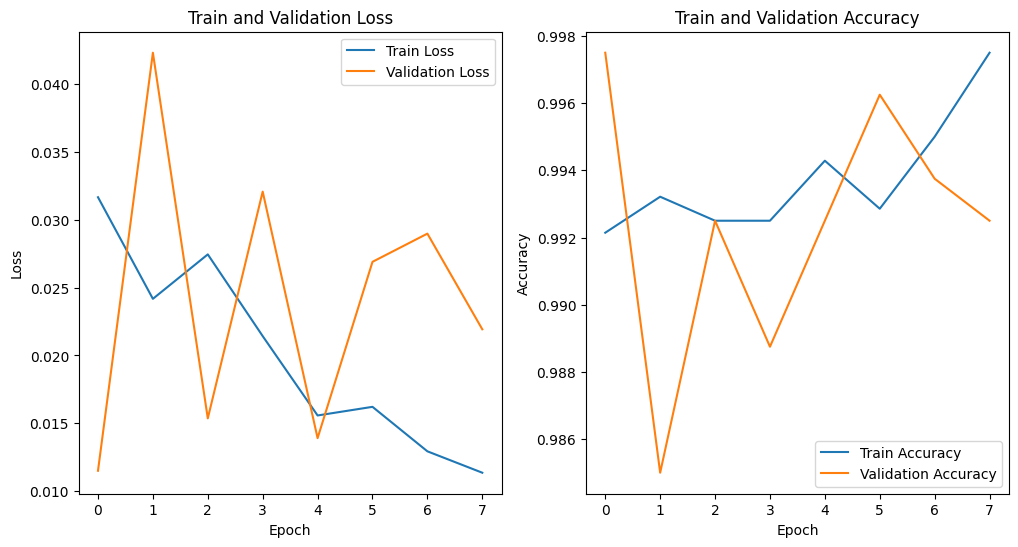

In [ ]:
# # Plot train and validation loss
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# # plt.plot(['loss'], label='Train Loss')
# # plt.plot(['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Train and Validation Loss')
# plt.legend()

# # Plot train and validation accuracy
# plt.subplot(1, 2, 2)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# # plt.plot(['accuracy'], label='Train Accuracy')
# # plt.plot(['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Train and Validation Accuracy')
# plt.legend()

# plt.show()

In [ ]:
# # Evaluate on test data
# loss_test, acc_test = model.evaluate_generator(test_data)
# print("Test Loss:", loss_test)
# print("Test Accuracy:", acc_test)

# # Plot test loss and accuracy
# plt.figure(figsize=(8, 4))
# plt.subplot(1, 2, 1)
# # plt.bar(['Test Loss'], [loss_test], color='blue')
# plt.plot(['Test Loss'], [loss_test], color='blue')
# plt.ylabel('Loss')
# plt.title('Test Loss')

# plt.subplot(1, 2, 2)
# # plt.bar(['Test Accuracy'], [acc_test], color='green')
# plt.plot(['Test Accuracy'], [acc_test], color='green')
# plt.ylabel('Accuracy')
# plt.title('Test Accuracy')

# plt.show()

1/1 [==============================] - 2s 2s/step


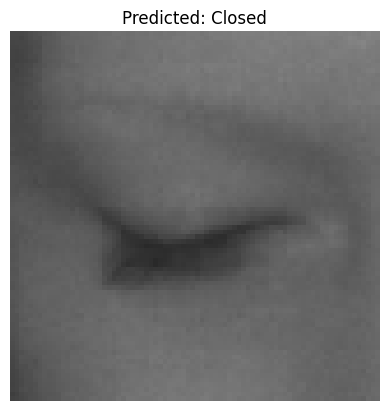

In [ ]:
# Load the trained model
model_path = '/content/gdrive/My Drive/Model/Model_3_5/InceptionV3_70_20_10.h5'
model = keras.models.load_model(model_path)

# Select a random image from the test dataset
random_test_image = np.random.choice(test_data.samples)

# Load and preprocess the image
img_path = test_data.filepaths[random_test_image]
img = image.load_img(img_path, target_size=(80, 80))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale to [0, 1]

# Predict the class probabilities for the image
predictions = model.predict(img_array)

# Interpret the predictions
class_names = ['Closed', 'Open']
predicted_class = np.argmax(predictions)

# Visualize the result
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted: {class_names[predicted_class]}')
plt.show()

1/1 [==============================] - 0s 47ms/step


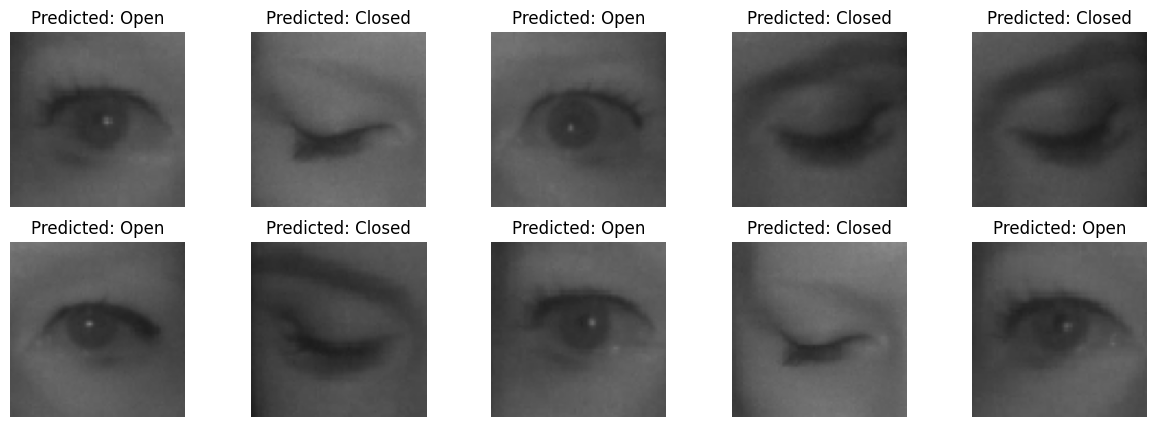

In [ ]:
# Select 5 random indices from the test dataset
random_indices = np.random.choice(test_data.samples, size=10, replace=False)

# Load the trained model
model_path = '/content/gdrive/My Drive/Model/Model_3_5/InceptionV3_70_20_10.h5'
model = keras.models.load_model(model_path)

# Display the 5 random images with appropriate labels
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    img_path = test_data.filepaths[idx]
    img = image.load_img(img_path, target_size=(80, 80))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Rescale to [0, 1]

    # Predict the class probabilities for the image
    predictions = model.predict(img_array)

    # Interpret the predictions
    class_names = ['Closed', 'Open']
    predicted_class = np.argmax(predictions)

    # Display the image with appropriate label
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.axis('off')

plt.show()